# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Import url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Empty lists to populate
cityName = []
latitude = []
longitude = []
temperature = []
cloudiness = []
humidity = []
windSpeed = []
country = []

#Loop through and populate the lists with data from the api
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        cityName.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        windSpeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
    except (KeyError):
        pass

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create new DF
city_frame = pd.DataFrame({'City': cityName,
                           'Latitude': latitude,
                           'Temperature': temperature,
                           'Cloudiness': cloudiness,
                           'Humidity': humidity,
                           'Wind Speed': windSpeed,
                           'Longitude': longitude,
                           'Country': country})
city_frame

,City,Latitude,Temperature,Cloudiness,Humidity,Wind Speed,Longitude,Country
0,Sedam,17.18,76.82,100,82,10.54,77.28,IN
1,Saskylakh,71.92,77.95,79,31,12.10,114.08,RU
2,Mahébourg,-20.41,71.60,75,68,13.87,57.70,MU
3,Chifeng,42.27,81.25,0,32,3.06,118.96,CN
4,Hermanus,-34.42,50.00,0,77,10.13,19.23,ZA
...,...,...,...,...,...,...,...,...
580,Sechelt,49.47,68.67,98,71,1.01,-123.77,CA
581,Nuuk,64.18,33.80,100,100,8.05,-51.72,GL
582,Bambanglipuro,-7.95,82.27,28,76,15.99,110.28,ID
583,Neuquén,-38.95,55.40,100,54,4.70,-68.06,AR


In [6]:
city_frame.to_csv(r'citydataframe.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

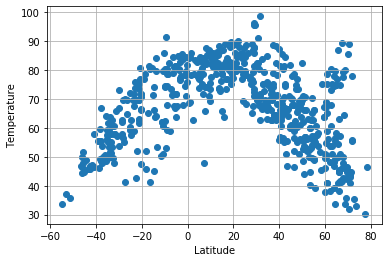

In [7]:
#Plot scatter plot
x_values = city_frame['Latitude']
y_values = city_frame['Temperature']
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.scatter(x_values,y_values)
plt.savefig('LatvsTemp.png')

#### Latitude vs. Humidity Plot

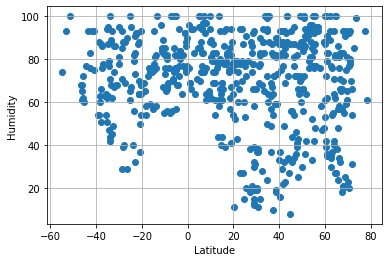

In [8]:
#Plot scatter plot
x_values = city_frame['Latitude']
y_values = city_frame['Humidity']
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.scatter(x_values,y_values)
plt.savefig('LatvsHum.png')

#### Latitude vs. Cloudiness Plot

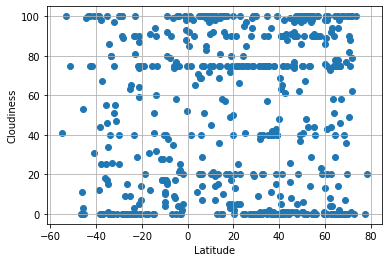

In [9]:
#Plot scatter plot
x_values = city_frame['Latitude']
y_values = city_frame['Cloudiness']
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.scatter(x_values,y_values)
plt.savefig('LatvsCloud.png')

#### Latitude vs. Wind Speed Plot

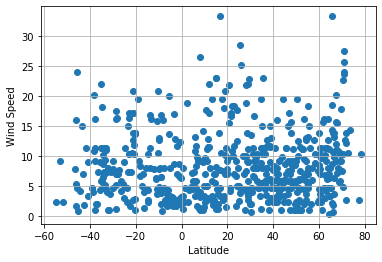

In [10]:
#Plot scatter plot
x_values = city_frame['Latitude']
y_values = city_frame['Wind Speed']
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.scatter(x_values,y_values)
plt.savefig('LatvsWind.png')

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots


In [12]:
# Create Northern and Southern Hemisphere DataFrames
nHem_df = city_frame[city_frame["Latitude"]>0]
sHem_df = city_frame[city_frame["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6894917932565523


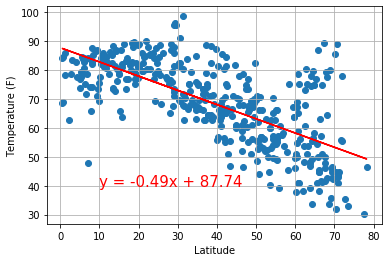

<Figure size 432x288 with 0 Axes>

In [13]:
#Linear regression function, plug in correct x and y values
x_values = nHem_df["Latitude"]
y_values = nHem_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-squared is: {rvalue}")
plt.grid()
plt.show()
plt.savefig('nLatvsTemp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7469022847444637


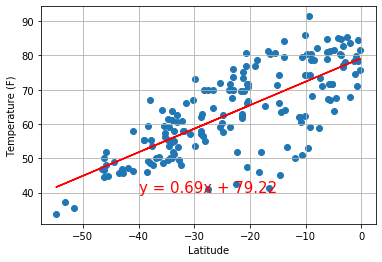

<Figure size 432x288 with 0 Axes>

In [14]:
#Linear regression function, plug in correct x and y values
x_values = sHem_df["Latitude"]
y_values = sHem_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-squared is: {rvalue}")
plt.grid()
plt.show()
plt.savefig('sTempvsLat.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.09531065364898723


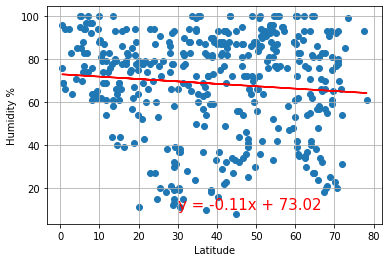

<Figure size 432x288 with 0 Axes>

In [15]:
#Linear regression function, plug in correct x and y values
x_values = nHem_df["Latitude"]
y_values = nHem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue}")
plt.grid()
plt.show()
plt.savefig('nHumvsLat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1320838600993429


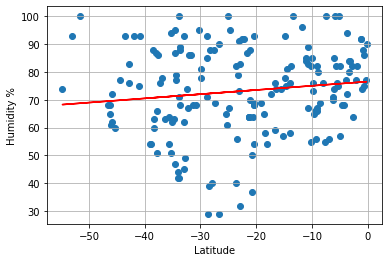

<Figure size 432x288 with 0 Axes>

In [16]:
#Linear regression function, plug in correct x and y values
x_values = sHem_df["Latitude"]
y_values = sHem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue}")
plt.grid()
plt.show()
plt.savefig('sHumvsLat.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.07246396722518794


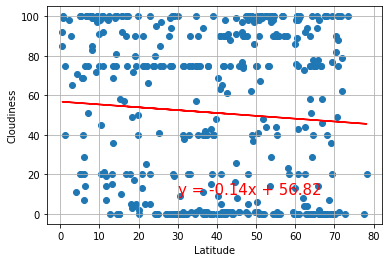

<Figure size 432x288 with 0 Axes>

In [17]:
#Linear regression function, plug in correct x and y values
x_values = nHem_df["Latitude"]
y_values = nHem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.grid()
plt.show()
plt.savefig('nCloudvsLat.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05956478378688755


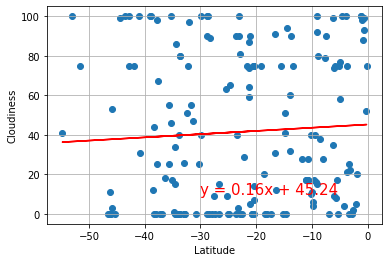

<Figure size 432x288 with 0 Axes>

In [18]:
#Linear regression function, plug in correct x and y values
x_values = sHem_df["Latitude"]
y_values = sHem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.grid()
plt.show()
plt.savefig('sCloudvsLat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0726364862039541


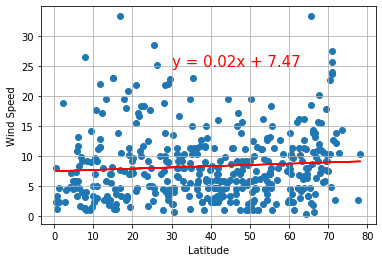

<Figure size 432x288 with 0 Axes>

In [19]:
#Linear regression function, plug in correct x and y values
x_values = nHem_df["Latitude"]
y_values = nHem_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.grid()
plt.show()
plt.savefig('nWindvsLat.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.05822785275528038


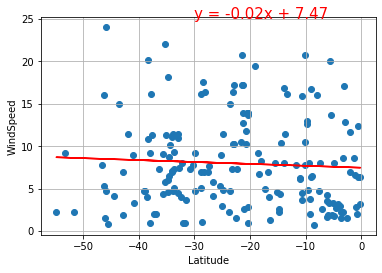

<Figure size 432x288 with 0 Axes>

In [20]:
#Linear regression function, plug in correct x and y values
x_values = sHem_df["Latitude"]
y_values = sHem_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('WindSpeed')
print(f"The r-squared is: {rvalue}")
plt.grid()
plt.show()
plt.savefig('sWindvsLat.png')